In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
groceries = []
# As the file is in transaction data we will be reading data directly 
with open("groceries.csv") as f:
    groceries = f.read()

In [3]:
groceries

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese ,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npot plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese ,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogur

In [4]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [5]:
groceries_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [6]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter

In [7]:
item_frequencies = Counter(all_groceries_list)
# after sorting
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [8]:
item_frequencies

[('baby food', 1),
 ('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('

In [9]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

C:\Users\Harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


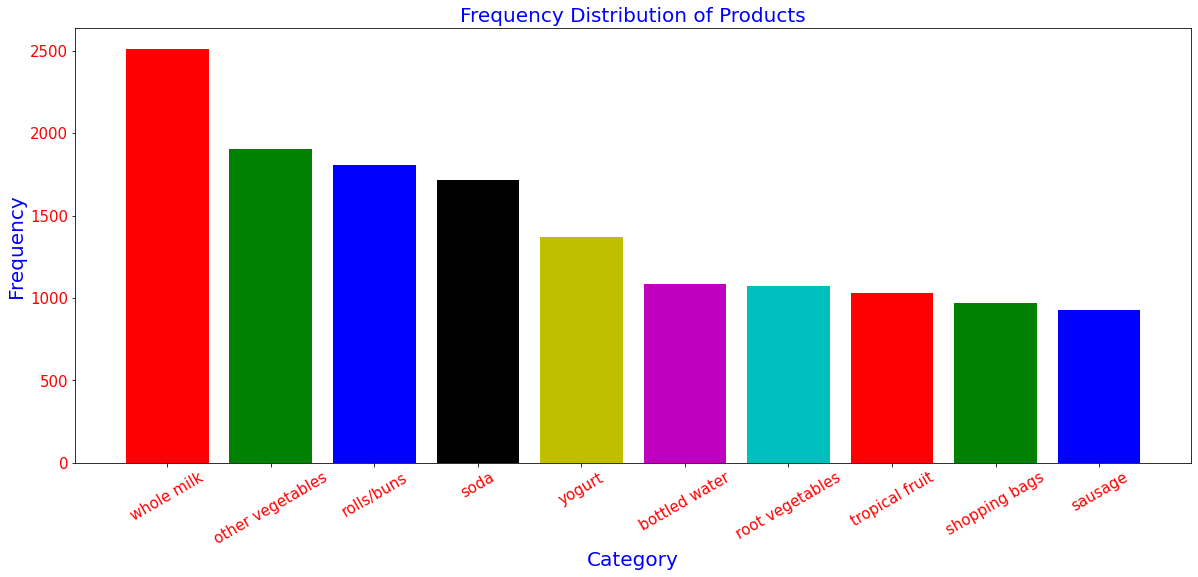

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])
plt.bar(items[0:10],frequencies[0:10],color='rgbkymc')
plt.xticks(fontsize=15,color='Red',rotation=30)
plt.yticks(fontsize=15,color='Red')
plt.xlabel('Category',fontsize=20,color='Blue')
plt.ylabel('Frequency',fontsize=20,color='Blue')
plt.title('Frequency Distribution of Products',fontsize=20,color='Blue')
plt.show()

In [11]:
# Creating Data Frame for the transactions data 
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

groceries_series.columns = ["transactions"]

In [12]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(soda, yogurt, whole milk)"
985,0.007931,"(whipped/sour cream, tropical fruit, whole milk)"
986,0.006202,"(yogurt, whipped/sour cream, tropical fruit)"
987,0.015150,"(yogurt, tropical fruit, whole milk)"


In [13]:
frequent_itemsets.itemsets[0:10]

0    (Instant food products)
1                 (UHT-milk)
2            (baking powder)
3                     (beef)
4                  (berries)
5                (beverages)
6             (bottled beer)
7            (bottled water)
8              (brown bread)
9                   (butter)
Name: itemsets, dtype: object

In [14]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.support[0:10]

117    0.255516
73     0.193493
88     0.183935
98     0.174377
118    0.139502
7      0.110524
89     0.108998
110    0.104931
96     0.098526
93     0.093950
Name: support, dtype: float64

C:\Users\Harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


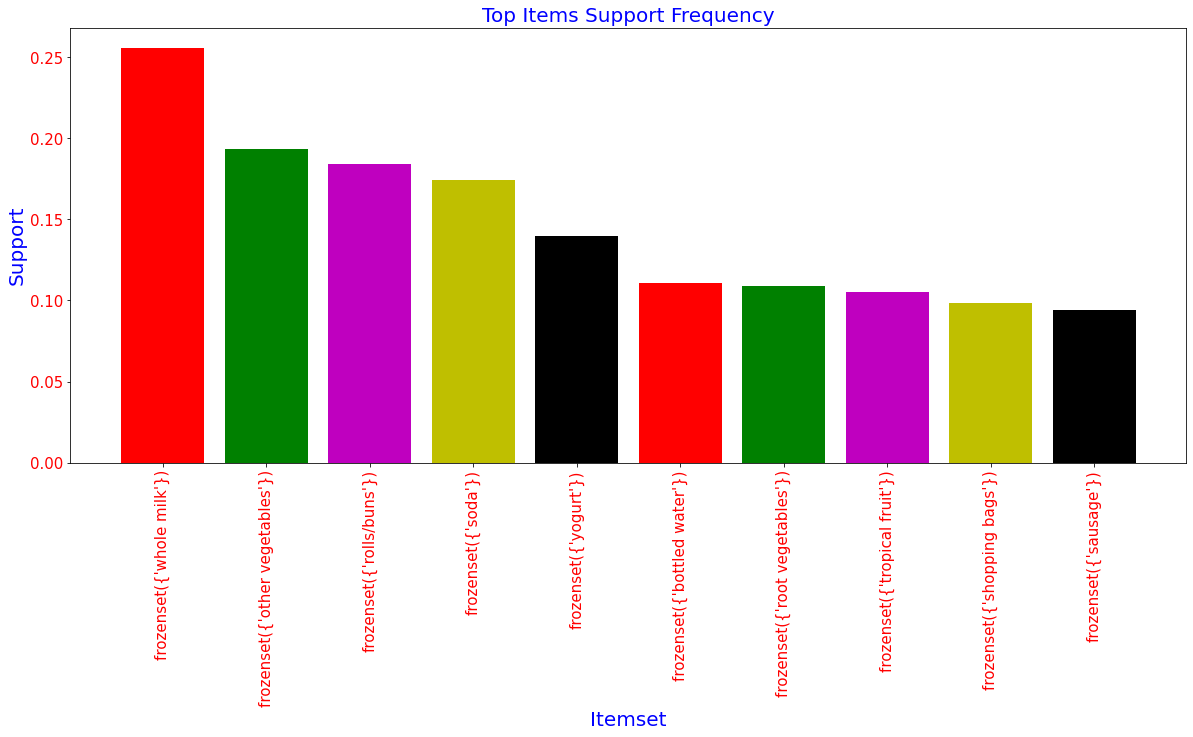

In [15]:
plt.figure(figsize=[20,8])
plt.bar(np.arange(0,10),frequent_itemsets.support[0:10],color='rgmyk')
plt.xticks(np.arange(0,10),frequent_itemsets['itemsets'])
plt.xticks(fontsize=15,color='Red',rotation=90)
plt.yticks(fontsize=15,color='Red')
plt.xlabel('Itemset',fontsize=20,color='Blue')
plt.ylabel('Support',fontsize=20,color='Blue')
plt.title('Top Items Support Frequency',fontsize=20,color='Blue')
plt.show()

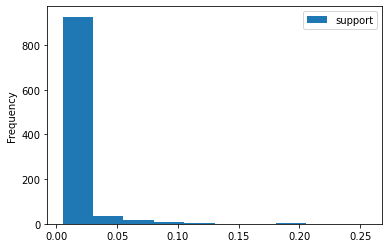

In [16]:
frequent_itemsets.plot.hist()

In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [18]:
rules.sort_values('lift',ascending = False,inplace=True)

In [19]:
## To eliminate Redudancy in Rules 
def to_list(i):
    return (sorted(list(i)))

In [20]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [21]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [22]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2022,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2042,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2206,(tropical fruit),"(pip fruit, citrus fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
777,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1470,"(whipped/sour cream, whole milk)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2435,(yogurt),"(curd, tropical fruit)",0.139502,0.010269,0.005287,0.037901,3.690645,0.003855,1.028720
1039,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1873,(butter),"(domestic eggs, whole milk)",0.055414,0.029995,0.005999,0.108257,3.609174,0.004337,1.087763
